## Processing data before optimization

In [2]:
import pandas as pd
df1 = pd.read_excel('new_input.xlsx',sheet_name='Profit',index_col = 0)
df2 = pd.read_excel('new_input.xlsx',sheet_name='Category',index_col = 0)
df3 = pd.read_excel('new_input.xlsx',sheet_name='Subcategory',index_col = 0)

In [3]:
df1.head()

,sales,returns,estimated_margins,platform_capacity,total_distribution_cost,pc_0.95,strategy,innovation
BDC,,,,,,,,
1005006,162664.580,718.5400,0.15,0.857131,7843.433142,0,Region Option,0
1005011,321341.300,2232.5800,0.15,0.857131,10384.414720,0,Region Option,0
1005182,959710.440,6415.8000,0.15,0.850000,47031.933310,0,Region Option,0
1015002,1822491.590,43770.2240,0.15,0.857131,188365.420300,0,Innovation 2017,0
1015006,5849902.955,39287.3564,0.15,0.857131,228709.662200,0,(blank),0


In [4]:
df1.hist(column='estimated_margins')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CDCBE6E80>]],
      dtype=object)

In [5]:
from sklearn import preprocessing
x = df1[['sales','returns','total_distribution_cost']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [6]:
#x = df1[['sales','returns','total_distribution_cost']]
#for col in x.columns:
#    x[col] = (x[col] - x[col].mean())/x[col].std(ddof=1)

In [7]:
#x.hist(column='total_distribution_cost')

In [8]:
#x.hist(column='sales')

In [9]:
df_norm = pd.DataFrame(x_scaled,columns=['sales','returns','total_distribution_cost'],index=df1.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CE1ED7710>]],
      dtype=object)

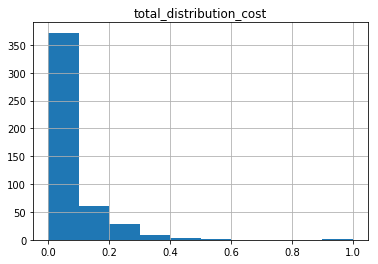

In [10]:
df_norm.hist(column='total_distribution_cost')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CE1F20908>]],
      dtype=object)

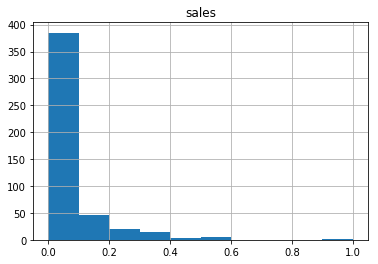

In [11]:
df_norm.hist(column='sales')

In [12]:
df_norm.head() 

,sales,returns,total_distribution_cost
BDC,,,
1005006,0.002476,0.002369,0.003042
1005011,0.004891,0.007361,0.004028
1005182,0.014608,0.021152,0.018242
1015002,0.027740,0.144304,0.073059
1015006,0.089040,0.129525,0.088707


In [13]:
#df_norm = x

In [14]:
df_norm['margin'] = df1['estimated_margins']
df_norm['pc0.95'] = df1['pc_0.95']
df_norm['innovation_2018'] = df1['innovation']

In [15]:
#df_norm.head()

In [16]:
#df_norm=df_norm.drop(columns=['score','innovation2018'])

In [17]:
score_weight = pd.DataFrame([1,0.2,0.1,0.1,0.01],\
                            index=['sales (base)',\
                                   'returns (-)',\
                                   'distribution cost (-)',\
                                   'margin (+)',\
                                   'manufacturing capacity (-)'],columns=['weight'])

#[0.27,0.32,0.22,0.14,0.05]

In [18]:
score_weight

,weight
sales (base),1.00
returns (-),0.20
distribution cost (-),0.10
margin (+),0.10
manufacturing capacity (-),0.01


In [19]:
df_norm['sample_score'] = score_weight.loc['sales (base)','weight']*df_norm["sales"]\
                          -score_weight.loc['returns (-)','weight']*df_norm['returns']\
                          -score_weight.loc['distribution cost (-)','weight']*df_norm['total_distribution_cost']\
                          +score_weight.loc['margin (+)','weight']*df_norm['margin']\
                          -score_weight.loc['manufacturing capacity (-)','weight']*df_norm['pc0.95']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CE1FE9588>]],
      dtype=object)

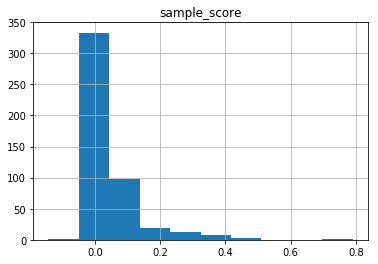

In [20]:
df_norm.hist(column='sample_score')

In [21]:
df_norm.head()

,sales,returns,total_distribution_cost,margin,pc0.95,innovation_2018,sample_score
BDC,,,,,,,
1005006,0.002476,0.002369,0.003042,0.15,0,0,0.016698
1005011,0.004891,0.007361,0.004028,0.15,0,0,0.018016
1005182,0.014608,0.021152,0.018242,0.15,0,0,0.023553
1015002,0.027740,0.144304,0.073059,0.15,0,0,0.006573
1015006,0.089040,0.129525,0.088707,0.15,0,0,0.069265


In [22]:
len(df_norm) # 474 BDC list (no NA value)

474

In [70]:
inno_req = pd.DataFrame([[10,30]],columns=['Innovation Requirement','Max number'])

In [71]:
inno_req

,Innovation Requirement,Max number
0,10,30


In [72]:
mid = pd.read_excel('mid-process.xlsx')

In [73]:
max_n = mid.groupby('subcategory_code')['BDC'].count()
subcategory_req = pd.DataFrame(max_n)
subcategory_req.insert(0, 'Minimum Requirement', 1)
subcategory_req.rename(columns={'BDC':'Max number'}, inplace=True)

In [74]:
max_n = mid.groupby('category_code')['BDC'].count()

In [75]:
category_req = pd.DataFrame(max_n)

In [76]:
category_req.insert(0, 'Minimum Requirement', 1)
category_req.rename(columns={'BDC':'Max number'}, inplace=True)

In [77]:
category_req

,Minimum Requirement,Max number
category_code,,
1,1,74
3,1,64
4,1,13
5,1,17
6,1,5
7,1,133
8,1,159
24,1,9


In [78]:
subcategory_req

,Minimum Requirement,Max number
subcategory_code,,
1,1,55
2,1,16
3,1,3
5,1,35
6,1,22
7,1,7
9,1,13
10,1,17
12,1,7


In [79]:
writer = pd.ExcelWriter('sample_input.xlsx')

df_norm.to_excel(writer,sheet_name='Product')

df2.to_excel(writer,sheet_name='Product_Category')

df3.to_excel(writer,sheet_name='Product_Subcategory')

score_weight.to_excel(writer,sheet_name='score_weight')

category_req.to_excel(writer,sheet_name='category_req')

subcategory_req.to_excel(writer,sheet_name='subcategory_req')

inno_req.to_excel(writer,sheet_name='inno_req',index=False)

writer.save()

## Optimization tool

In [9]:
def optimize(inputfile,outputfile):
    
    # import packages
    import pandas as pd
    from gurobipy import Model,GRB
    
    # read input data
    df_norm = pd.read_excel(inputfile,sheet_name='Product',index_col = 0)
    df2 = pd.read_excel(inputfile,sheet_name='Product_Category',index_col = 0)
    df3 = pd.read_excel(inputfile,sheet_name='Product_Subcategory',index_col = 0)
    score_weight = pd.read_excel(inputfile,sheet_name='score_weight',index_col = 0)
    category_req = pd.read_excel(inputfile,sheet_name='category_req',index_col = 0)
    subcategory_req = pd.read_excel(inputfile,sheet_name='subcategory_req',index_col = 0)
    inno_req = pd.read_excel(inputfile,sheet_name='inno_req')
    
    # calculate product quality score based on the weight assigned by user
    df_norm['score'] = score_weight.loc['sales (base)','weight']*df_norm["sales"]\
                          -score_weight.loc['returns (-)','weight']*df_norm['returns']\
                          -score_weight.loc['distribution cost (-)','weight']*df_norm['total_distribution_cost']\
                          +score_weight.loc['margin (+)','weight']*df_norm['margin']\
                          -score_weight.loc['manufacturing capacity (-)','weight']*df_norm['pc0.95']
    
    # gurobi optimization
    mod = Model()

    I = df_norm.index
    J = df2.columns
    K = df3.columns
    
    # decision variable: whether to select product i
    x = mod.addVars(I,vtype = GRB.BINARY)

    # maximize product quality score
    mod.setObjective(sum(x[i]*df_norm.loc[i,'score'] for i in I),\
                     sense = GRB.MAXIMIZE)
    
    # small format quantity constraint
    mod.addConstr(sum(x[i] for i in I) <= 250)
    
    # innovation constraint
    # include at least #(decided by user) of 2018-innovation products
    mod.addConstr(sum(df_norm.loc[i,'innovation_2018']*x[i] for i in I) >= inno_req.loc[0,'Innovation Requirement'])
    
    # category constraint
    # include at least #(decided by user) of products for each category
    for j in J:
        mod.addConstr(sum(df2.loc[i,j]*x[i] for i in I) >= category_req.loc[j,'Minimum Requirement'])

    # subcategory constraint
    # include at least #(decided by user) of products for each subcategory
    for k in K:
        mod.addConstr(sum(df3.loc[i,k]*x[i] for i in I) >= subcategory_req.loc[k,'Minimum Requirement'])

    mod.optimize()
    
    # generate a list of selected product BDC for output
    SKU = []
    for i in I:
        if x[i].x != 0:
            SKU.append(i)
            
    choice = pd.DataFrame(SKU,columns=['BDC'])
    
    choice.to_excel(outputfile,index=False)
    
    return mod.objval

In [10]:
optimize('sample_input.xlsx','sample_output.xlsx')

Optimize a model with 28 rows, 474 columns and 1452 nonzeros
Variable types: 0 continuous, 474 integer (474 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-05, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+02]
Found heuristic solution: objective 16.2865195
Presolve removed 11 rows and 39 columns
Presolve time: 0.01s
Presolved: 17 rows, 435 columns, 898 nonzeros
Found heuristic solution: objective 19.1006441
Variable types: 0 continuous, 435 integer (435 binary)

Root relaxation: objective 2.191201e+01, 4 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      21.9120127   21.91201  0.00%     -    0s

Explored 0 nodes (4 simplex iterations) in 0.02 seconds
Thread count was 4 (of 4 available processors)

Solution count 3: 21.912 19.1006 16.3854 

Optimal solution found (

21.912012704378707

In [6]:
from optimize import optimize

In [7]:
optimize('sample_input.xlsx','sample_output.xlsx')

Optimize a model with 28 rows, 474 columns and 1452 nonzeros
Variable types: 0 continuous, 474 integer (474 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-05, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+02]
Found heuristic solution: objective 16.2865195
Presolve removed 11 rows and 39 columns
Presolve time: 0.00s
Presolved: 17 rows, 435 columns, 898 nonzeros
Found heuristic solution: objective 19.1006441
Variable types: 0 continuous, 435 integer (435 binary)

Root relaxation: objective 2.191201e+01, 4 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      21.9120127   21.91201  0.00%     -    0s

Explored 0 nodes (4 simplex iterations) in 0.02 seconds
Thread count was 4 (of 4 available processors)

Solution count 3: 21.912 19.1006 16.3854 

Optimal solution found (